# Usando Json e Api do IBGE

In [1]:
import pandas as pd

## Carregando os dados da api

In [2]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

### Criando um Data frame com apenas a coluna nome

In [4]:
frames = [nomes_m, nomes_f]
nomes = pd.concat(frames)['nome'].to_frame()

In [5]:
nomes.sample(5)

,nome
144,LORENA
190,LURDES
131,ANGELICA
122,ADAO
191,TERESA


## Gerando ID para os alunos

In [6]:
import numpy as np

In [7]:
total_alunos = nomes.shape[0]
total_alunos

400

In [8]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1 
nomes

,nome,id_aluno
0,JOSE,234
1,JOAO,51
2,ANTONIO,41
3,FRANCISCO,323
4,CARLOS,143
...,...,...
195,ROSANE,70
196,IVONETE,313
197,LUCIANE,363
198,ISADORA,126


## Gerando Emails para os alunos

In [9]:
dominios_email = ['@gmail.com', '@hotmail.com']

In [10]:
nomes['dominio'] = np.random.choice(dominios_email, total_alunos)

In [11]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,JOSE,234,@hotmail.com,jose@hotmail.com
1,JOAO,51,@gmail.com,joao@gmail.com
2,ANTONIO,41,@hotmail.com,antonio@hotmail.com
3,FRANCISCO,323,@hotmail.com,francisco@hotmail.com
4,CARLOS,143,@hotmail.com,carlos@hotmail.com
...,...,...,...,...
195,ROSANE,70,@hotmail.com,rosane@hotmail.com
196,IVONETE,313,@gmail.com,ivonete@gmail.com
197,LUCIANE,363,@hotmail.com,luciane@hotmail.com
198,ISADORA,126,@gmail.com,isadora@gmail.com


In [12]:
nomes.sample(5)

,nome,id_aluno,dominio,email
25,BEATRIZ,378,@hotmail.com,beatriz@hotmail.com
111,CLEITON,360,@gmail.com,cleiton@gmail.com
131,ANGELICA,292,@hotmail.com,angelica@hotmail.com
161,DAMIAO,11,@gmail.com,damiao@gmail.com
86,MAURO,233,@gmail.com,mauro@gmail.com


## Criando dataframe de cursos

In [13]:
import html5lib

In [20]:
url_cursos = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url_cursos)[0]

In [21]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


### Alterações básicas no dataframe

In [28]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'},inplace=True)

In [29]:
cursos['id'] = cursos.index + 1

In [30]:
cursos.set_index('id',inplace= True)

In [33]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Atribuindo quantidade de matriculas aos alunos e Visualizando Distribuição

In [38]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
72,CAROLINE,369,@hotmail.com,caroline@hotmail.com,1
9,MARCOS,192,@hotmail.com,marcos@hotmail.com,1
35,CARLA,167,@gmail.com,carla@gmail.com,1
16,EDUARDO,232,@hotmail.com,eduardo@hotmail.com,1
198,ISADORA,126,@gmail.com,isadora@gmail.com,1


In [39]:
nomes.matriculas.describe()

count    400.000000
mean       2.082500
std        1.483643
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [42]:
nomes.matriculas.value_counts()

1     189
2     106
3      48
4      26
5      15
6       9
7       5
8       1
12      1
Name: matriculas, dtype: int64

In [40]:
import seaborn as sns

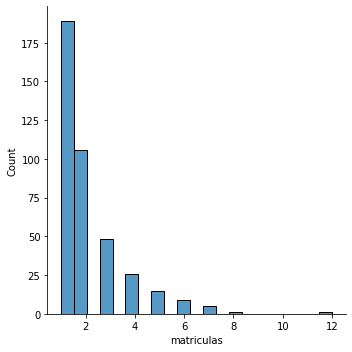

In [41]:
sns.displot(nomes.matriculas)

## Criando a tabela de relação: Aluno -> Cursos

In [52]:
todas_matriculas = []
x = np.random.rand(cursos.shape[0])
probabilidade = x / sum(x)

In [54]:
for index, linha in nomes.iterrows():
    id = linha.id_aluno
    matriculas = linha.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = probabilidade)]
        todas_matriculas.append(mat)

In [58]:
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,234,1
1,51,20
2,41,15
3,41,9
4,41,12


In [68]:
tabela  = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [79]:
tabela.sort_index()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,30,Java para Web
3,54,C# para Web
4,21,Ruby on Rails
5,26,Cursos de Python
6,52,PHP com MySql
7,37,.NET para web
8,61,Novas integrações com Java
9,69,TDD com Java


## Saida de dados

### Os 3 dataframes criados:

In [82]:
tabela
cursos
nomes
matriculas

,nome,id_aluno,dominio,email,matriculas
0,JOSE,234,@hotmail.com,jose@hotmail.com,1
1,JOAO,51,@gmail.com,joao@gmail.com,1
2,ANTONIO,41,@hotmail.com,antonio@hotmail.com,3
3,FRANCISCO,323,@hotmail.com,francisco@hotmail.com,1
4,CARLOS,143,@hotmail.com,carlos@hotmail.com,2
...,...,...,...,...,...
195,ROSANE,70,@hotmail.com,rosane@hotmail.com,6
196,IVONETE,313,@gmail.com,ivonete@gmail.com,1
197,LUCIANE,363,@hotmail.com,luciane@hotmail.com,1
198,ISADORA,126,@gmail.com,isadora@gmail.com,1


### Exportando para csv

In [89]:
cursos.to_csv('cursos.csv', index=False)
tabela.to_csv('tabela.csv', index=False)
nomes.to_csv('nomes.csv', index=False)

### Exportando para Json

In [83]:
cursos_json = cursos.to_json()

In [85]:
cursos_json

'{"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [86]:
tabela_json = tabela.to_json()

In [87]:
tabela_json

'{"quantidade_de_alunos":{"1":73,"2":30,"3":54,"4":21,"5":26,"6":52,"7":37,"8":61,"9":69,"10":35,"11":49,"12":45,"13":50,"14":35,"15":65,"16":4,"17":10,"18":9,"19":42,"20":66},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

### Exportando para html

In [88]:
tabela.to_html('tabela.html')

## Criando Banco SQL e adicionando tabelas

In [90]:
from sqlalchemy import create_engine, MetaData, Table

In [91]:
engine = create_engine('sqlite:///:memory:')

In [92]:
type(engine)

sqlalchemy.engine.base.Engine

In [94]:
tabela.to_sql('matriculas', engine)

In [95]:
engine.table_names()

['matriculas']

### Fazendo querys no banco

In [103]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [104]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,16,4,Estatística básica
1,17,10,Internet das coisas
2,18,9,Programação funcional


In [105]:
tabela_lida_sql = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [109]:
muitas_matriculas = tabela_lida_sql.query('quantidade_de_alunos > 50')

In [110]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,73
2,C# para Web,54
5,PHP com MySql,52
7,Novas integrações com Java,61
8,TDD com Java,69
14,Análise de dados,65
19,Orientação objetos com Java,66


## Selecionando alunos para uma próxima turma


In [112]:
tabela

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,30,Java para Web
3,54,C# para Web
4,21,Ruby on Rails
5,26,Cursos de Python
6,52,PHP com MySql
7,37,.NET para web
8,61,Novas integrações com Java
9,69,TDD com Java


### Escolheremos a turma de Ruby on Rails

In [114]:
id_curso = 4
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))

In [115]:
proxima_turma

,id_aluno,id_curso
44,220,4
58,5,4
81,273,4
124,347,4
195,203,4
221,255,4
400,52,4
410,18,4
463,91,4
471,309,4


In [119]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [120]:
proxima_turma

,nome
id_aluno,
220,FABIO
5,RICARDO
273,MATHEUS
347,MAURICIO
203,ADILSON
255,ARTUR
52,ERIC
18,WESLEI
91,JESSICA


In [121]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Ruby on Rails
Name: 4, dtype: object

In [124]:
proxima_turma = proxima_turma.rename(columns={'nome': 'Alunos matriculados na turma de {}'.format(nome_curso.nome_do_curso)})

In [125]:
proxima_turma

,Alunos matriculados na turma de Ruby on Rails
id_aluno,
220,FABIO
5,RICARDO
273,MATHEUS
347,MAURICIO
203,ADILSON
255,ARTUR
52,ERIC
18,WESLEI
91,JESSICA


#### Exportando para Excel

In [130]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)